<a href="https://colab.research.google.com/github/Astra42/Deep-NN--DPO/blob/main/1_urfu_dl_fashion_mnist_dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание предметов одежды с помощью Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://openedu.ru/course/urfu/PYDNN/)".

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [ ]:
# В Keras встроены средства работы с популярными наборами данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [ ]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

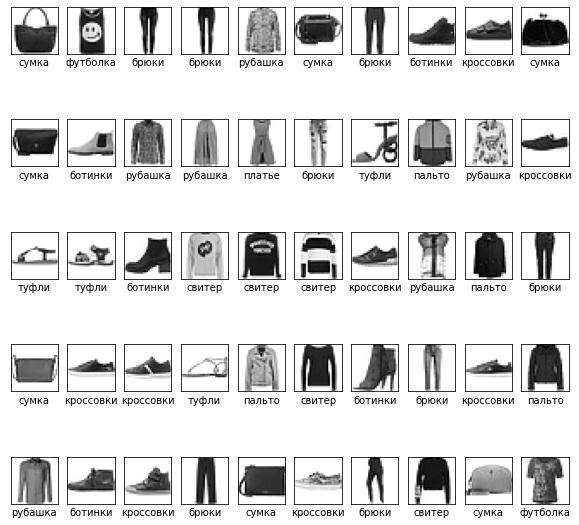

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [ ]:
x_train = x_train.reshape(60000, 784)

**Нормализация данных**

In [ ]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 

**Работа с правильными ответами**

Просматриваем пример правильного ответа

In [ ]:
print(y_train[0])

9


**Преобразуем метки в формат one hot encoding**

In [ ]:
y_train = utils.to_categorical(y_train, 10)

**Правильный ответ в формате one hot encoding**

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Описываем архитектуру нейронной сети**

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству предметов одежды)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [ ]:
model.fit(x_train, y_train, 
          batch_size=200, 
          epochs=50,  
          verbose=1)#verbose - прогресс в отчёт в консоль

Epoch 1/50
300/300 [==============================] - 3s 3ms/step - loss: 0.5136 - accuracy: 0.8208
Epoch 2/50
300/300 [==============================] - 1s 3ms/step - loss: 0.3725 - accuracy: 0.8659
Epoch 3/50
300/300 [==============================] - 1s 3ms/step - loss: 0.3341 - accuracy: 0.8791
Epoch 4/50
300/300 [==============================] - 1s 3ms/step - loss: 0.3057 - accuracy: 0.8881
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2875 - accuracy: 0.8949
Epoch 6/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2733 - accuracy: 0.9003
Epoch 7/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2573 - accuracy: 0.9054
Epoch 8/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2438 - accuracy: 0.9100
Epoch 9/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2357 - accuracy: 0.9118
Epoch 10/50
300/300 [==============================] - 1s 3ms/step - loss: 0.2242 - accuracy: 0.9177

## Используем сеть для распознавания моделей одежды

**Запускаем распознавание набора данных, на котором обучалась сеть**

In [ ]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 3s 2ms/step


**Проверяем качество распознавания**

Просматриваем пример изображения

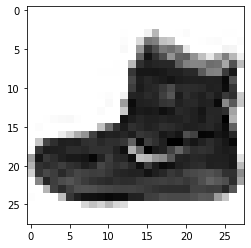

In [ ]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 0
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Данные на выходе из сети в формате one-hot-encoding

In [ ]:
print(predictions[n])

[4.71792285e-27 9.09013651e-15 1.40716091e-15 1.96808592e-15
 4.78537302e-18 1.28404025e-08 4.76669858e-14 9.68502645e-05
 1.54628197e-17 9.99903083e-01]


Определяем номер класса изображения, который предлагает сеть

In [ ]:
np.argmax(predictions[n])

9

Печатаем название класса

In [ ]:
classes[np.argmax(predictions[n])]#возвращает индекс макс элемента в массива

'ботинки'

Печатаем номер класса правильного ответа

In [ ]:
np.argmax(y_train[n])

9

Печатаем название класса правильного ответа

In [ ]:
classes[np.argmax(y_train[n])]

'ботинки'

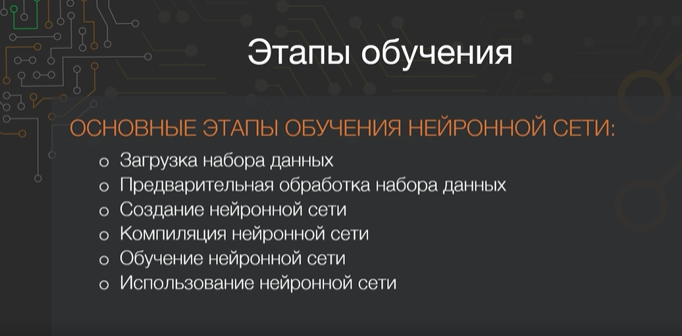
  
